In [64]:
import torchvision
from torchvision import transforms 
import torch
from torch import no_grad
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")

In [65]:
def get_predictions(pred, threshold=0.8, objects=None):
    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]
    
    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

In [66]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
      
      label=predicted_class[0]
      probability=predicted_class[1]
      box=predicted_class[2]
      t = round(box[0][0].tolist())
      l = round(box[0][1].tolist())
      r = round(box[1][0].tolist())
      b = round(box[1][1].tolist())

      # Giving brief information about rectange, class and probability.
      from colorama import Fore
      from colorama import Style
      print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
      print(f"Box coordinates: {t}, {l}, {r}, {b}")
      print(f"Probability: {probability}")

      cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
      cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
      cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, 
                  text_size, (0,255,0), thickness=text_th)
      cv2.putText(image, label+": "+str(round(probability, 2)), 
                  (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size, 
                  (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if download_image:
      plt.savefig(f'{img_name}.png')
    else:
      pass
    plt.show()
    
    del(img)
    del(image)

In [67]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

done


In [68]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

90

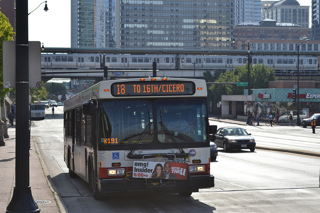

In [70]:
img_path=r"C:\Users\Milind\Desktop\cs518\project\coco2014\images\test2014\COCO_test2014_000000008516.jpg"
image = Image.open(img_path)
image.resize([int((1/2) * s) for s in image.size])

In [72]:
transform = transforms.Compose([transforms.ToTensor()])


Label: train
Box coordinates: 125, 147, 436, 400
Probability: 0.9986808896064758

Label: motorcycle
Box coordinates: 602, 227, 639, 256
Probability: 0.9945741295814514

Label: bicycle
Box coordinates: 333, 223, 385, 270
Probability: 0.9927306771278381

Label: motorcycle
Box coordinates: 426, 254, 512, 306
Probability: 0.9907152652740479

Label: motorcycle
Box coordinates: 420, 279, 436, 324
Probability: 0.985018789768219

Label: truck
Box coordinates: 30, 104, 522, 151
Probability: 0.9818902015686035

Label: motorcycle
Box coordinates: 114, 204, 126, 212
Probability: 0.9720669388771057

Label: bicycle
Box coordinates: 511, 223, 520, 252
Probability: 0.9703318476676941

Label: bicycle
Box coordinates: 621, 236, 633, 268
Probability: 0.9628511071205139

Label: bicycle
Box coordinates: 103, 213, 109, 230
Probability: 0.9605371356010437

Label: bicycle
Box coordinates: 538, 227, 547, 253
Probability: 0.9589182138442993

Label: motorcycle
Box coordinates: 99, 201, 115, 215
Probability: 0.9

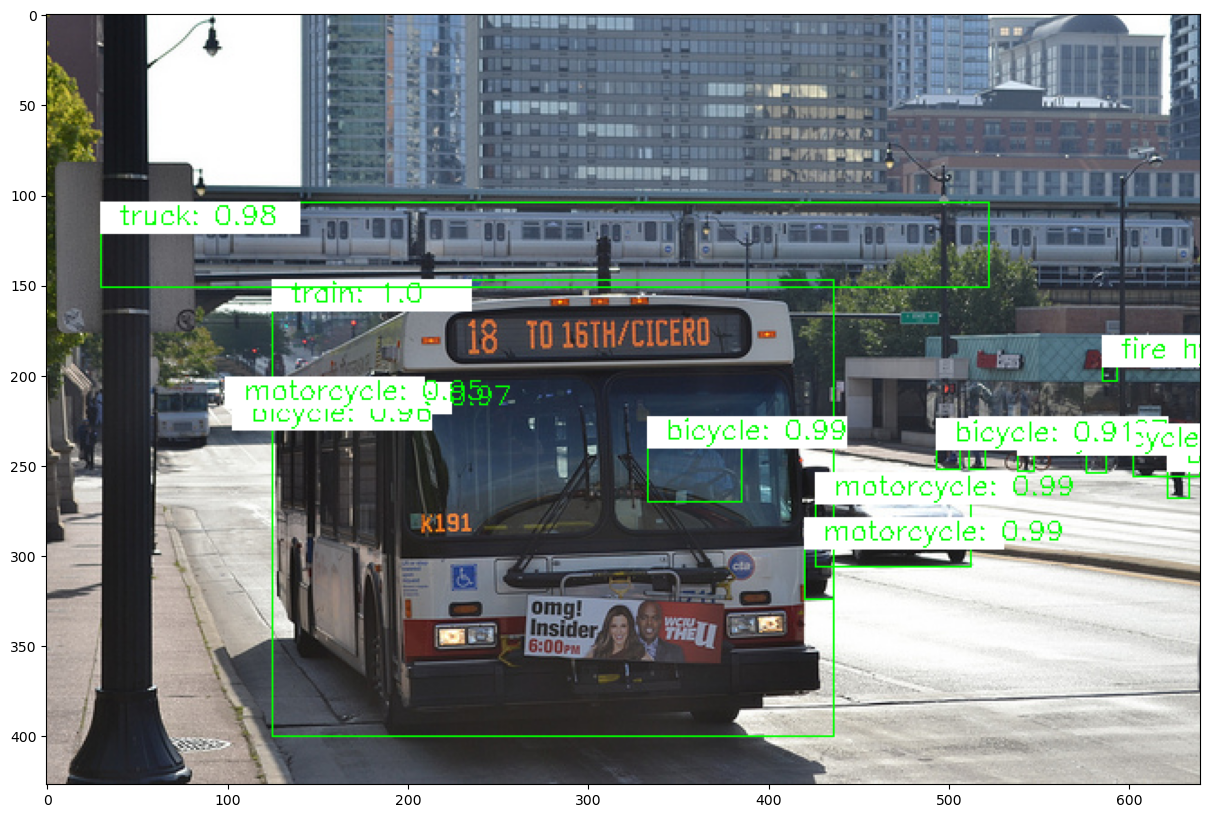

In [76]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.9)
draw_box(pred_thresh, img, rect_th=1, text_size= 0.5, text_th=1)

del pred_thresh